In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../datasets/SuperStoreUS.csv')

### 1.Analyze sales and profit by product category and sub-category


In [4]:
products = df.groupby(['Product Category', 'Product Sub-Category'])[['Sales', 'Profit']].agg(['sum', 'mean'])       
products['Profit_Margin'] = (products[('Profit', 'sum')] / products[('Sales', 'sum')]) * 100

products

Sales               \
                                                       sum         mean   
Product Category Product Sub-Category                                     
Furniture        Bookcases                       107796.09  2506.885814   
                 Chairs & Chairmats              261072.73  2837.747065   
                 Office Furnishings               98070.91   530.113027   
                 Tables                          193764.58  2422.057250   
Office Supplies  Appliances                       82144.71   829.744545   
                 Binders and Binder Accessories  185928.14   929.640700   
                 Envelopes                        10479.77   190.541273   
                 Labels                            4914.82    69.222817   
                 Paper                            55813.92   196.527887   
                 Pens & Art Supplies              26071.61   161.935466   
                 Rubber Bands                      1789.43    52.630294   
                 Scissors, Rulers and Trimmers     6752.18   187.560556   
                 Storage & Organization          177417.60  1364.750769   
Technology       Computer Peripherals             96261.30   553.225862   
                 Copiers and Fax                  99069.48  5503.860000   
                 Office Machines                 318169.68  3349.154526   
                 Telephones and Communication    198764.49  1024.559227   

                                                       Profit               \
                                                          sum         mean   
Product Category Product Sub-Category                                        
Furniture        Bookcases                        -930.438400   -21.638102   
                 Chairs & Chairmats              48695.836600   529.302572   
                 Office Furnishings              18724.119100   101.211455   
                 Tables                          -7240.071364   -90.500892   
Office Supplies  Appliances                      12804.070600   129.334046   
                 Binders and Binder Accessories  59296.389430   296.481947   
                 Envelopes                       -1194.412500   -21.716591   
                 Labels                           7028.159500    98.988162   
                 Paper                            7769.315070    27.356743   
                 Pens & Art Supplies              -257.628800    -1.600179   
                 Rubber Bands                    -1544.826063   -45.436061   
                 Scissors, Rulers and Trimmers   -1291.095900   -35.863775   
                 Storage & Organization           7124.288200    54.802217   
Technology       Computer Peripherals             1698.043980     9.758873   
                 Copiers and Fax                 23990.207580  1332.789310   
                 Office Machines                  8824.390562    92.888322   
                 Telephones and Communication    40790.514240   210.260383   

                                                Profit_Margin  
                                                               
Product Category Product Sub-Category                          
Furniture        Bookcases                          -0.863147  
                 Chairs & Chairmats                 18.652211  
                 Office Furnishings                 19.092429  
                 Tables                             -3.736530  
Office Supplies  Appliances                         15.587213  
                 Binders and Binder Accessories     31.892101  
                 Envelopes                         -11.397316  
                 Labels                            142.999327  
                 Paper                              13.920031  
                 Pens & Art Supplies                -0.988158  
                 Rubber Bands                      -86.330623  
                 Scissors, Rulers and Trimmers     -19.121171  
                 Storage & Orga

### 2. Calculate profit margins by category

In [5]:
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

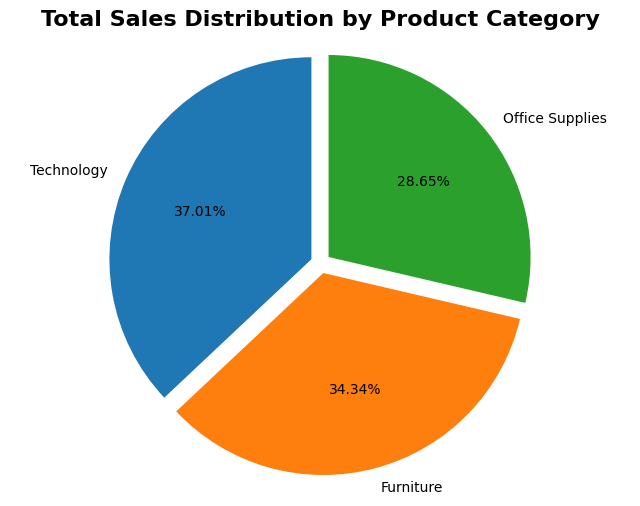

In [6]:
products_profit_margin = df.groupby(['Product Category'])[['Sales', 'Profit', 'Profit_Margin']].agg(['sum', 'mean'])


sales_sum = products_profit_margin[('Sales', 'sum')].sort_values(ascending=False)
# Create customized pie chart
plt.figure(figsize=(8, 6))
plt.pie(sales_sum.values, 
         labels=sales_sum.index, 
         autopct='%1.2f%%',
         startangle=90,
         explode=[0.05] * len(sales_sum))  # Slight separation

plt.title('Total Sales Distribution by Product Category', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()


### 3. Identify top and bottom performing sub-categories


In [7]:
# by profit
top_by_Profit = products.sort_values(by=('Profit', 'sum'), ascending=False).head(5)
bottom_by_Profit = products.sort_values(by=('Profit', 'sum'), ascending=True).head(5)

# by sales
top_by_sales = products.sort_values(by=('Sales', 'sum'), ascending=False).head(5)
bottom_by_sales = products.sort_values(by=('Sales', 'sum'), ascending=True).head(5)

Top and bottom performing product sub category by profit


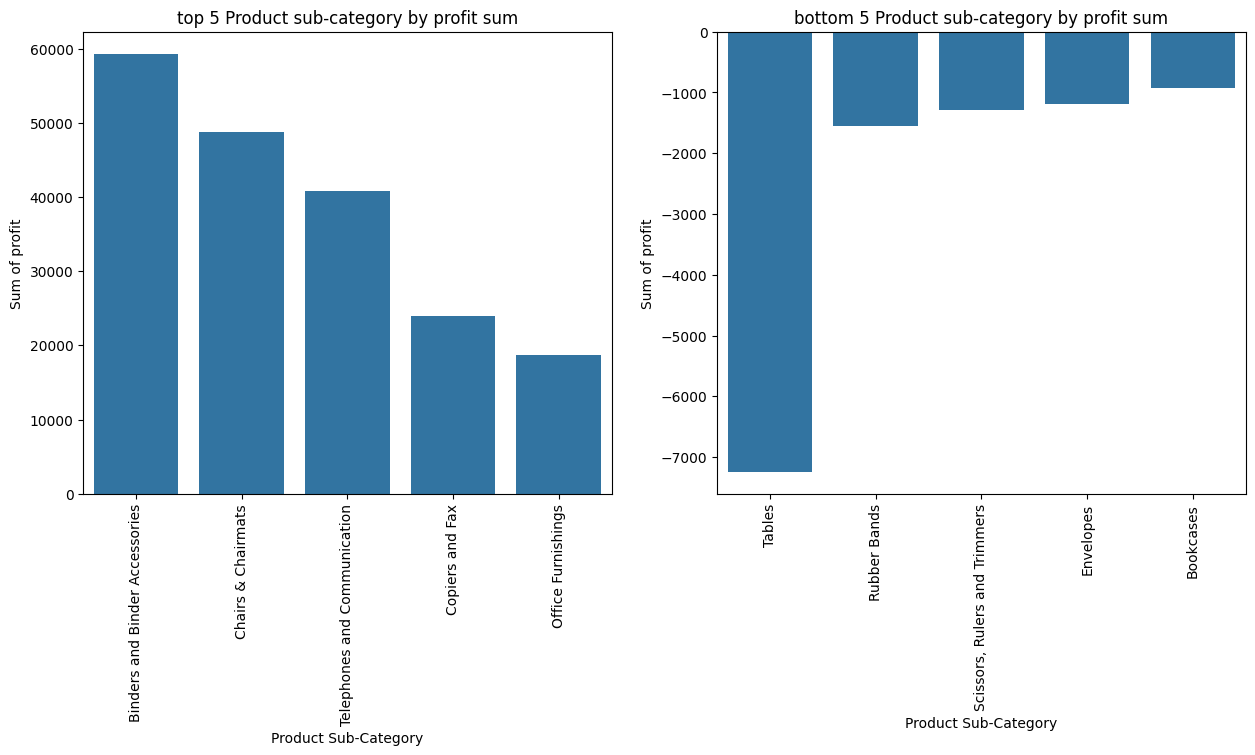

Top and bottom performing product sub category by sales


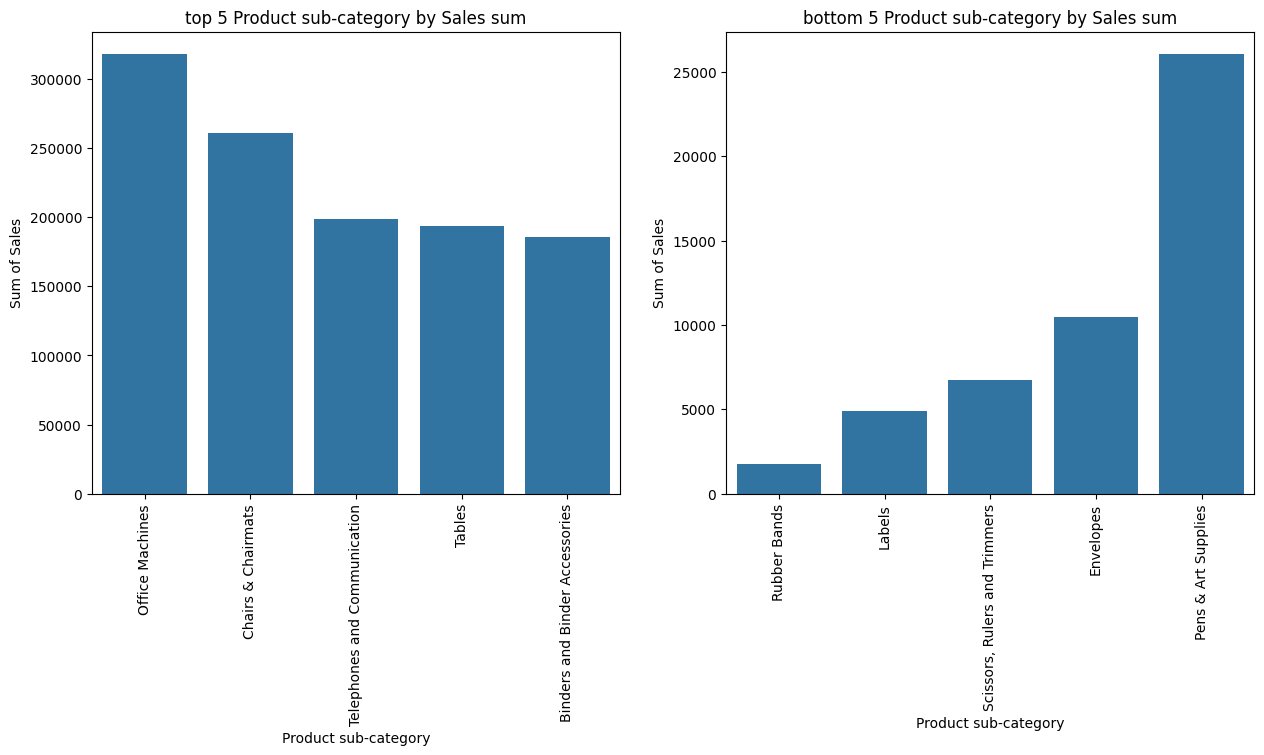

In [ ]:
print("Top and bottom performing product sub category by profit")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(data=top_by_Profit, x='Product Sub-Category', y=('Profit', 'sum'), ax=ax1)
ax1.set_title('top 5 Product sub-category by profit sum')
ax1.set_ylabel('Sum of profit')
ax1.tick_params(axis='x', rotation=90)  

sns.barplot(data=bottom_by_Profit, x='Product Sub-Category', y=('Profit', 'sum'), ax=ax2)
ax2.set_title('bottom 5 Product sub-category by profit sum')
ax2.set_ylabel('Sum of profit')
ax2.tick_params(axis='x', rotation=90)  

plt.show()

print("Top and bottom performing product sub category by sales")

fig2, (ax4, ax5) = plt.subplots(1, 2, figsize=(15, 6))


sns.barplot(data=top_by_sales, x='Product Sub-Category', y=('Sales', 'sum'), ax=ax4)
ax4.set_title('top 5 Product sub-category by Sales sum')
ax4.set_xlabel('Product sub-category')
ax4.set_ylabel('Sum of Sales')
ax4.tick_params(axis='x', rotation=90)

sns.barplot(data=bottom_by_sales, x='Product Sub-Category', y=('Sales', 'sum'), ax=ax5)
ax5.set_title('bottom 5 Product sub-category by Sales sum')
ax5.set_xlabel('Product sub-category')
ax5.set_ylabel('Sum of Sales')
ax5.tick_params(axis='x', rotation=90)

plt.show()



### 4. Analyze the relationship between discount and sales by category


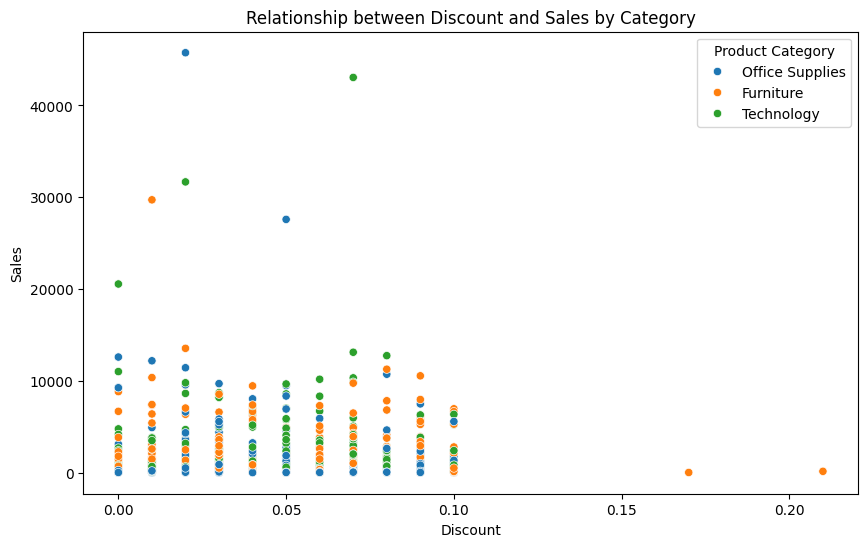

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Sales', hue='Product Category')
plt.title('Relationship between Discount and Sales by Category')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

### 5. Create a product performance matrix


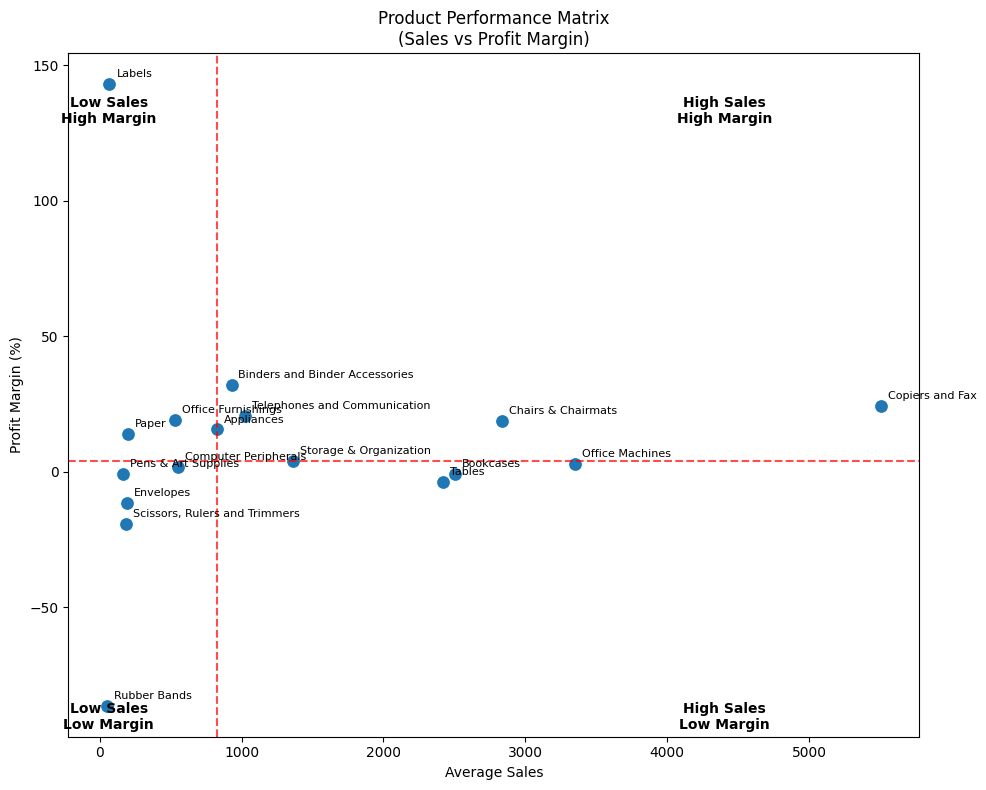

In [10]:

# Calculate average sales and profit margin by product sub-category
product_performance = df.groupby('Product Sub-Category').agg({
    'Sales': 'mean',
    'Profit': 'mean'
}).reset_index()

# Calculate profit margin
product_performance['Profit_Margin'] = (product_performance['Profit'] / product_performance['Sales']) * 100

# Create scatter plot matrix
plt.figure(figsize=(10, 8))
sns.scatterplot(data=product_performance, 
                x='Sales', 
                y='Profit_Margin', 
                s=100)

# Add product labels
for i, txt in enumerate(product_performance['Product Sub-Category']):
    plt.annotate(txt, (product_performance['Sales'].iloc[i], 
                      product_performance['Profit_Margin'].iloc[i]),
                 xytext=(5, 5), textcoords='offset points', fontsize=8)

# Add quadrant lines
plt.axhline(y=product_performance['Profit_Margin'].median(), color='red', linestyle='--', alpha=0.7)
plt.axvline(x=product_performance['Sales'].median(), color='red', linestyle='--', alpha=0.7)

plt.title('Product Performance Matrix\n(Sales vs Profit Margin)')
plt.xlabel('Average Sales')
plt.ylabel('Profit Margin (%)')

# Add quadrant labels
plt.text(product_performance['Sales'].max()*0.8, product_performance['Profit_Margin'].max()*0.9, 
         'High Sales\nHigh Margin', ha='center', fontweight='bold')
plt.text(product_performance['Sales'].min()*1.2, product_performance['Profit_Margin'].max()*0.9, 
         'Low Sales\nHigh Margin', ha='center', fontweight='bold')
plt.text(product_performance['Sales'].max()*0.8, product_performance['Profit_Margin'].min()*1.1, 
         'High Sales\nLow Margin', ha='center', fontweight='bold')
plt.text(product_performance['Sales'].min()*1.2, product_performance['Profit_Margin'].min()*1.1, 
         'Low Sales\nLow Margin', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()